<h2 align = "center"> Ensemble</h2>

### Some important terms

* Bagging, Random Forest, Boosting
* For bagging, we end up with having 63% of unique observations
* To measure the confidence of the classification, we can either use margin (the difference between the majority vote and the minority vote
* In a real-world situation, we generally want to have a much larger test set to estimate our unseen accuracy. In fact, because of this, we are more inclined to believe our outof-bag accuracy measurement, which is done over a larger number of observations and averaged over many models.
* Adaboost is basically update the coefficient weight for each weak learner, update the weights for each data points all based on the weighted classification error and the final model is the sign of the sum of all the weak learners

### Bagging

### Bagging 

  Strenghts     | Weakness
  ------------- | -------------
  1) Smoothens the overall output and reduce the bias when the target function is smooth| Sampling<br/> 1) sampling might have ignored the level in the categorical variables with very few observations <br/> 2) Unbalanced sample will always favor the majority one <br/>3) High Leverage points bagging performance depends on how often these particular observations are sampled <br/> Bagging: <br/>4) Not truly independent (the same set of the features) 

In [12]:
library(ggtech)
library(ggplot2)
library(extrafont)
font_import(pattern = 'Circular', prompt=FALSE)

Registering fonts with R
Scanning ttf files in C:\WINDOWS\Fonts ...
Extracting .afm files from .ttf files...
C:\Windows\Fonts\Circular Air-Bold 3.46.45 PM.ttf : CircularAir-Bold already registered in fonts database. Skipping.
C:\Windows\Fonts\Circular Air-Medium 3.46.45 PM.ttf : CircularAir-Medium already registered in fonts database. Skipping.
Found FontName for 0 fonts.
Scanning afm files in C:/Users/menli/Documents/R/win-library/3.3/extrafontdb/metrics


In [1]:
library(ipred)

In [ ]:
baggedTree = bagging(y~., data = , nbagg = 100, coob = T) # 

In [20]:
setwd("E:/Personal/InterviewQuestion/Rscripts")
bnote = read.table("data_banknote_authentication.txt", sep = ",")
colnames(bnote) = c("waveletVar", "waveletSkew", "waveletCurt", "entropy","class")
#bnote$class = as.factor(bnote$class)

In [3]:
head(bnote)

,waveletVar,waveletSkew,waveletCurt,entropy,class
1,3.6216,8.6661,-2.8073,-0.44699,1
2,4.5459,8.1674,-2.4586,-1.4621,1
3,3.866,-2.6383,1.9242,0.10645,1
4,3.4566,9.5228,-4.0112,-3.5944,1
5,0.32924,-4.4552,4.5718,-0.9888,1
6,4.3684,9.6718,-3.9606,-3.1625,1


In [4]:
n = dim(bnote)[1]

### Construct the bootstrapped samples by sampling the index

In [26]:
M = 11
seeds = 1000: (1000+M-1)
sample_vector = sapply(seeds, function(i){
    set.seed(i); return (sample(n,n,replace = T))})

### Create one initial model

In [22]:
train_1glm = function(sample_indices){
    data = bnote[sample_indices,]
    model = glm(class~., data = data, family = binomial("logit"))
    return(model)
}

### Get all the models

In [23]:
allModels = apply(sample_vector,2,train_1glm)

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

### Find unique observations in each data

In [ ]:
 get_1bag <- function(sample_indices) {     
     unique_sample <- unique(sample_indices)
     df <- heart_train[unique_sample, ]
     df$ID <- unique_sample
     return(df)  }

In [ ]:
bags = apply(sample_vectors, 2, get_1bag)

### Construct the prediction model

In [13]:
glm_prediction = function(model, data, model_index){
    colname = paste("prediction", model_index)
    data[colname] = as.numeric(predict(model, data, type = "response") >0.5)
    return(data[,c("ID", colname)], drop = FALSE)
}

[1] 1372

In [ ]:
training_predictions =  mapply(glm_predictions, models, bags, 1 : M, SIMPLIFY = F) 
# mapply is to  applies FUN to the first elements of each ... argument, the second elements, the third elements, and so on.

In [ ]:
rain_pred_df <- Reduce(function(x, y) merge(x, y, by = "ID", all = T), training_predictions)

In [ ]:
train_pred_vote <- apply(train_pred_df[,-1], 1, function(x) as.numeric(mean(x, na.rm = TRUE) > 0.5))

In [ ]:
### Then merge all the data and its prediction to one dataframe

In [24]:
get_1oo_bag <- function(sample_indices) {  unique_sample <- setdiff(1 : n, unique(sample_indices))
                                         df <- bnote[unique_sample,]     
                                         df$ID <- unique_sample
                                         return(df)  }

In [27]:
oo_bags <- apply(sample_vector, 2, get_1oo_bag) # Each list has different size of observations

### Boosting

  Strenghts     | Weakness
  ------------- | -------------
  1) combining the weak learners can help reduce overfitting|  1) Use all training data and progressively to correct each mistake <br/> 2) Symetric loss funtction no distinction that is made in classification between a fp and fn error

In [ ]:
AdaBoostNN <- function(training_data, output_column, M, hidden_units) {   
    require("nnet")   
    models <- list()   
    alphas <- list()   
    n <- nrow(training_data)   
    model_formula <- as.formula(paste(output_column, '~ .', sep = ''))   
    w <- rep((1/n), n)   
    for (m in 1:M) {    model <- nnet(model_formula, data = training_data, size = hidden_units, weights = w)   
                        models[[m]] <- model    
                        predictions <- as.numeric(predict(model,
                                                          training_data[, -which(names(training_data) == output_column)], type = "class")) 
                        errors <- predictions != training_data[, output_column]     
                        error_rate <- sum(w * as.numeric(errors)) / sum(w)    
                         alpha <- 0.5 * log((1 - error_rate) / error_rate)     
                         alphas[[m]] <- alpha     
                         temp_w <- mapply(function(x, y) if (y) { x * exp(alpha) } else { x * exp(-alpha)}, w, errors)     
                                 w <- temp_w / sum(temp_w)   }   
                        return(list(models = models, alphas = unlist(alphas))) }

## Stochastic Gradient Boosting

in every iteration of boosting, we compute a gradient in the direction of the errors that are made by the model trained in the current iteration.

In [ ]:
N <- 1000
X1 <- runif(N)
X2 <- 2*runif(N)
X3 <- ordered(sample(letters[1:4],N,replace=TRUE),levels=letters[4:1])
X4 <- factor(sample(letters[1:6],N,replace=TRUE))
X5 <- factor(sample(letters[1:3],N,replace=TRUE))
X6 <- 3*runif(N) 
mu <- c(-1,0,1,2)[as.numeric(X3)]

SNR <- 10 # signal-to-noise ratio
Y <- X1**1.5 + 2 * (X2**.5) + mu
sigma <- sqrt(var(Y)/SNR)
Y <- Y + rnorm(N,0,sigma)

# introduce some missing values
X1[sample(1:N,size=500)] <- NA
X4[sample(1:N,size=300)] <- NA

data <- data.frame(Y=Y,X1=X1,X2=X2,X3=X3,X4=X4,X5=X5,X6=X6)

# fit initial model
gbm1 <-
gbm(Y~X1+X2+X3+X4+X5+X6,         # formula
    data=data,                   # dataset
    var.monotone=c(0,0,0,0,0,0), # -1: monotone decrease,
                                 # +1: monotone increase,
                                 #  0: no monotone restrictions
    distribution="gaussian",     # For regression model
    n.trees=1000,                # number of trees
    shrinkage=0.05,              # shrinkage or learning rate,(how fast the algorithm is going to learn the parameter before each sequential model)
                                 # 0.001 to 0.1 usually work
    interaction.depth=3,         # 1: additive model, 2: two-way interactions, etc.
    bag.fraction = 0.5,          # subsampling fraction, 0.5 is probably best
    train.fraction = 0.5,        # fraction of data for training,
                                 # first train.fraction*N used for training
    n.minobsinnode = 10,         # minimum total weight needed in each node
    cv.folds = 3,                # do 3-fold cross-validation
    keep.data=TRUE,              # keep a copy of the dataset with the object
    verbose=FALSE,               # don't print out progress
    n.cores=1)                   # use only a single core (detecting #cores is
                                 # error-prone, so avoided here)

# check performance using an out-of-bag estimator
# OOB underestimates the optimal number of iterations
best.iter <- gbm.perf(gbm1,method="OOB") # Get the best iteration
print(best.iter)

# check performance using a 50% heldout test set
best.iter <- gbm.perf(gbm1,method="test")
print(best.iter)

## Random Forest 

  Strenghts     | Weakness
  ------------- | -------------
  1) Feature sampling allows us to consider input features that are successful in splitting the data for only a small range of the target variable. These locally relevant features are rarely chosen without the sampling constraint because we usually prefer features that form good overall splits of the data at a given node in the tree. <br/> 2)sampling input features is useful when we have correlated input features. Regular tree construction tends to favor only one of the features from a correlated set while ignoring the rest despite the fact that the resulting splits from even highly correlated features are not exactly the same.<br/> 3) , this model is a good choice when the number of features exceeds the number of observations. <br/> 4) the sampling process mitigates the cost of constructing a large number of trees </br> 5) Can handle noisy or missing outliers data as well as categorical, continuous features </br> 6) did feature selection </br>|  1)  Unlike a decision tree, the model is not easily interpretable 2)  May require some work to tune the model to the data

* Each daughter node is then split again until the process reaches the stopping criteria of either node purity or node member size, which defines the set of terminal (unsplit) nodes for the tree.

* The Out-of-Bag prediction error estimates have been shown
to be nearly identical to n–fold cross validation estimates (Hastie, Tibshirani, and Friedman
2009). This feature of Random Forests allows us to obtain both model fit and validation in
one pass of the algorithm.

<h3> <font color = "red"> don't have to include interaction terms as tree is good at finding interactions </font></h3>

<h3> <font color = "red">  Missing Values need to impute first beforehand using rfimpute</font></h3>

Random Forest handle missing values : https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#missing1

* based on the proximity matrix to compute the NAs 

In [12]:
library(randomForest)

In [ ]:
data(iris)
iris.na <- iris
set.seed(111)
## artificially drop some data values.
for (i in 1:4) iris.na[sample(150, sample(20)), i] <- NA
set.seed(222)
randomForest(Species~., iris.na, na.action = na.omit)
iris.imputed <- rfImpute(Species ~ ., iris.na, ntree = 500) #still going to be a data frame 

set.seed(333)
iris.rf <- randomForest(Species ~ ., iris.imputed)
print(iris.rf)

For random forests, it turns out that we can still measure variable importance scores for the different input features by tallying and keeping track of the reductions in our error function across all the trees in the ensemble. 

In [ ]:
randomForest(x, y=NULL, xtest=NULL, ytest=NULL, 
             ntree=500,#How many trees## Very common to build somewhere between 700 and several thousand trees
#n rees is the number of trees that will be built for the ensemble and mtry is the number of features sampled for use at each node for splitin
             mtry=,#p/3 or sqrt(p)
             replace=TRUE, 
             classwt=NULL, 
#Priors of the classes. Need not add up to one. 
 #The basic idea is to weight classes such that rarely observations are more likely to be selected to the group
 #these values are trasformed in probabilities for sampling training data
             cutoff,  #the threshold to declare a winner (the ROC/precision-recall curve)
             strata,
             sampsize = if (replace) nrow(x) else ceiling(.632*nrow(x)),
             nodesize = if (!is.null(y) && !is.factor(y)) 5 else 1,
             maxnodes = NULL,
             importance=FALSE, 
#. MeanDecreaseAccuracy is computed from permuting OOB data: For each tree, the prediction error on the out-of-bag portion of the data is
# recorded (error rate for classification, MSE for regression). Then the same is done after permuting
# each predictor variable. The difference between the two are then averaged over all trees, and normalized
# by the standard deviation of the differences. If the standard deviation of the differences is
# equal to 0 for a variable, the division is not done (but the average is almost always equal to 0 in that
    # case).
# MeanDecreaseGini is the total decrease in node impurities from splitting on the variable, averaged over all trees. 
# For classification, the node impurity is measured by the Gini index. For regression, it
                    # is measured by residual sum of squares.
  
             localImp=FALSE, nPerm=1,
             proximity, #Should proximity measure among the rows be calculated? 
 #It is like clustering as we assume the observations which fall into the same terminal node are more similar 
#Since observations that have similar x values ‘travel’ the same way on splits more often than values
# with dissimilar values, the co-occurence in terminal nodes is a suitable measure of similarity. Using this logic
# a so called proximity matrix is calculated. 
# It is a n by n matrix where each entry gives the proportion of terminal nodes that two observations are fall together
             oob.prox=proximity,
             norm.votes=TRUE, 
             do.trace=FALSE,
             keep.forest=,
             corr.bias=FALSE,
             keep.inbag=FALSE, ...,
                 na.action = na.omit)

In [1]:
require(RCurl)
require(prettyR)

url <- "https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CleanCreditScoring.csv"
cs_data <- getURL(url)
cs_data <- read.csv(textConnection(cs_data))

Loading required package: RCurl
Loading required package: bitops
Loading required package: prettyR


In [2]:
str(cs_data)

'data.frame':	4446 obs. of  27 variables:
 $ Status    : Factor w/ 2 levels "bad","good": 2 2 1 2 2 2 2 2 2 1 ...
 $ Seniority : int  9 17 10 0 0 1 29 9 0 0 ...
 $ Home      : Factor w/ 6 levels "ignore","other",..: 6 6 3 6 6 3 3 4 3 4 ...
 $ Time      : int  60 60 36 60 36 60 60 12 60 48 ...
 $ Age       : int  30 58 46 24 26 36 44 27 32 41 ...
 $ Marital   : Factor w/ 5 levels "divorced","married",..: 2 5 2 4 4 2 2 4 2 2 ...
 $ Records   : Factor w/ 2 levels "no_rec","yes_rec": 1 1 2 1 1 1 1 1 1 1 ...
 $ Job       : Factor w/ 4 levels "fixed","freelance",..: 2 1 2 1 1 1 1 1 2 4 ...
 $ Expenses  : int  73 48 90 63 46 75 75 35 90 90 ...
 $ Income    : int  129 131 200 182 107 214 125 80 107 80 ...
 $ Assets    : int  0 0 3000 2500 0 3500 10000 0 15000 0 ...
 $ Debt      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Amount    : int  800 1000 2000 900 310 650 1600 200 1200 1200 ...
 $ Price     : int  846 1658 2985 1325 910 1645 1800 1093 1957 1468 ...
 $ Finrat    : num  94.6 60.3 67 67.9 34.1 ...


In [4]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



#### Get the train set and test set

In [3]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [5]:
classes <- cs_data[, "Status"]
predictors <- cs_data[, -match(c("Status", "Seniority", "Time", "Age", "Expenses", 
    "Income", "Assets", "Debt", "Amount", "Price", "Finrat", "Savings"), colnames(cs_data))]

train_set <- createDataPartition(classes, p = 0.8, list = FALSE)

#### Tune the parameter

In [6]:
customRF <- list(type = "Classification", library = "randomForest", loop = NULL)
customRF$parameters <- data.frame(parameter = c("mtry", "ntree"), class = rep("numeric", 2), label = c("mtry", "ntree"))
customRF$grid <- function(x, y, len = NULL, search = "grid") {}
customRF$fit <- function(x, y, wts, param, lev, last, weights, classProbs, ...) {
    randomForest(x, y, mtry = param$mtry, ntree=param$ntree, ...)
}
customRF$predict <- function(modelFit, newdata, preProc = NULL, submodels = NULL)
    predict(modelFit, newdata)
customRF$prob <- function(modelFit, newdata, preProc = NULL, submodels = NULL)
    predict(modelFit, newdata, type = "prob")
customRF$sort <- function(x) x[order(x[,1]),]
customRF$levels <- function(x) x$classes
customRF

$type
[1] "Classification"

$library
[1] "randomForest"

$loop
NULL

$parameters
  parameter   class label
1      mtry numeric  mtry
2     ntree numeric ntree

$grid
function (x, y, len = NULL, search = "grid") 
{
}

$fit
function (x, y, wts, param, lev, last, weights, classProbs, ...) 
{
    randomForest(x, y, mtry = param$mtry, ntree = param$ntree, 
        ...)
}

$predict
function (modelFit, newdata, preProc = NULL, submodels = NULL) 
predict(modelFit, newdata)

$prob
function (modelFit, newdata, preProc = NULL, submodels = NULL) 
predict(modelFit, newdata, type = "prob")

$sort
function (x) 
x[order(x[, 1]), ]

$levels
function (x) 
x$classes


In [7]:
cs_data$Status = factor(cs_data$Status)

In [8]:
set.seed(123)

cs_data_train = cs_data[train_set, ]
cs_data_test = cs_data[-train_set, ]

# Define the tuned parameter
grid <- expand.grid(mtry = seq(4,12,4), ntree = c(700, 1000) )

ctrl <- trainControl(method = "cv", number = 10, summaryFunction = twoClassSummary,classProbs = TRUE)

rf_fit <- train(Status ~ Seniority + Home + Time + Age, data = cs_data_train, #can't use the number but the factor 
                    #method = "rf",
                    #preProcess = c("center", "scale"),
                tuneGrid = grid,
                    trControl = ctrl,      
                    method = customRF,
                   metric= "ROC" #define which metric to optimize metric='RMSE'
               )
rf_fit

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin

Warning message:
In randomForest.default(x, y, mtry = param$mtry, ntree = param$ntree, : invalid mtry: reset to within valid rangeWarning message:
In randomForest.default(x, y, mtry = param$mtry, ntree = param$ntree, : invalid mtry: reset to within valid rangeWarning message:
In randomForest.default(x, y, mtry = param$mtry, ntree = param$ntree, : invalid mtry: reset to within valid rangeWarning message:
In randomForest.default(x, y, mtry = param$mtry, ntree = param$ntree, : invalid mtry: reset to within valid rangeWarning message:
In randomForest.default(x, y, mtry = param$mtry, ntree = param$ntree, : invalid mtry: reset to within valid rangeWarning message:
In randomForest.default(x, y, mtry = param$mtry, n

3558 samples
  26 predictor
   2 classes: 'bad', 'good' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3202, 3202, 3202, 3202, 3203, 3202, ... 
Resampling results across tuning parameters:

  mtry  ntree  ROC        Sens   Spec     
   4     700   0.6842031  0.267  0.9034298
   4    1000   0.6846333  0.266  0.9014782
   8     700   0.6430756  0.333  0.8170420
   8    1000   0.6421913  0.333  0.8209635
  12     700   0.6426238  0.332  0.8170389
  12    1000   0.6420215  0.335  0.8201746

ROC was used to select the optimal model using  the largest value.
The final values used for the model were mtry = 4 and ntree = 1000. 

#### Train the whole data on the chosen parameter

In [9]:
rf = randomForest(y = cs_data_train$Status, x = cs_data_train[,-1],
ytest = cs_data_test$Status, xtest = cs_data_test[, -1],
ntree = 1000, mtry = 4, keep.forest = TRUE, importance = TRUE, proximity = TRUE) #mtry use three features on each split
rf


Call:
 randomForest(x = cs_data_train[, -1], y = cs_data_train$Status,      xtest = cs_data_test[, -1], ytest = cs_data_test$Status,      ntree = 1000, mtry = 4, importance = TRUE, proximity = TRUE,      keep.forest = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 21.42%
Confusion matrix:
     bad good class.error
bad  470  530  0.53000000
good 232 2326  0.09069586
                Test set error rate: 21.96%
Confusion matrix:
     bad good class.error
bad  111  138  0.55421687
good  57  582  0.08920188

In [91]:
rf$test$confusion 

,bad,good,class.error
bad,111.0000000,138.0000000,0.5542169
good,57.00000000,582.00000000,0.08920188


#### Classification Error

In [97]:
classificationErrorHeatmap = function(model) {
    d <- data.frame(model$confusion)
    names(d)[ncol(d)] <- "Error"
    confusion.melt = melt(data.frame(rownames(d),round(d,3)))
    colnames(confusion.melt) = c("Y", "X", "Count")
    g2 <- ggplot(data=confusion.melt, aes(x = X, y = Y, fill = Count, label=Count)) +  
             theme(legend.position="top", legend.key.width=unit(0.1,"npc")) +
             labs(x = "Predicted Class and Class Error", y = "Observed Class") +
             geom_tile() +
             scale_fill_gradient( low = "white", high = "#fd5c63", na.value="black", name = "Count" ) + 
             geom_text() +  
             geom_rect(size=1, fill=NA, colour="black",
             aes(xmin=length(levels(X))-0.5, xmax=length(levels(X))+0.5, ymin=1-0.5, ymax=length(levels(Y))+0.5)) +
             geom_rect(size=2, fill=NA, colour="black",
             aes(xmin=1-0.5, xmax=length(levels(X))+0.5, ymin=1-0.5, ymax=length(levels(Y))+0.5))
    return(g2)
}

Using rownames.d. as id variables


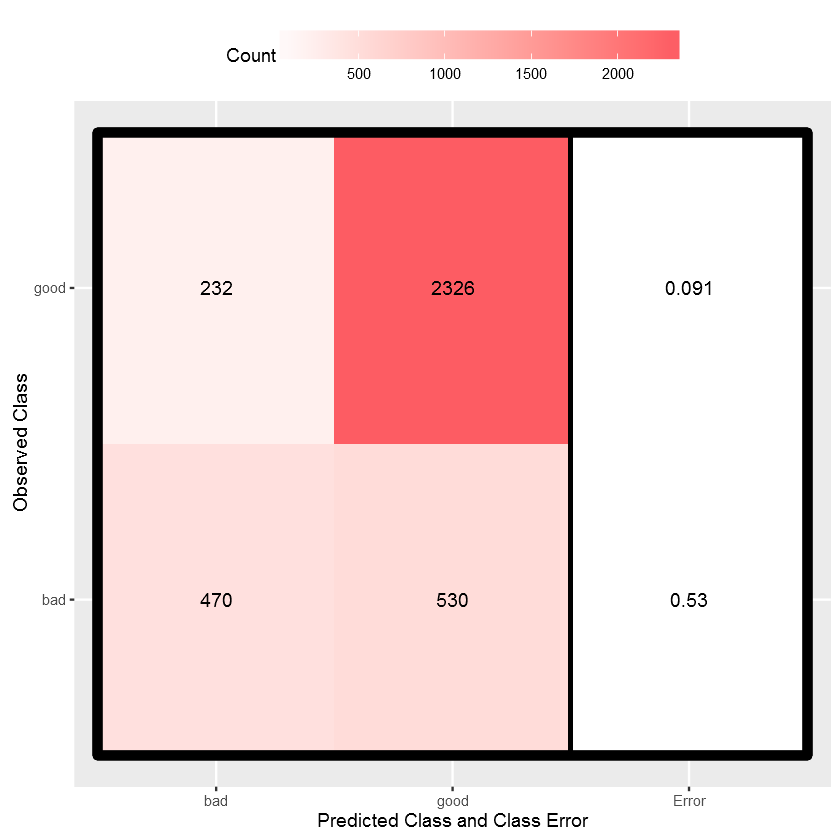

In [98]:
classificationErrorHeatmap(rf)

#### Variables used in the model

In [100]:
names(cs_data_train)

[1] "Status"     "Seniority"  "Home"       "Time"       "Age"       
 [6] "Marital"    "Records"    "Job"        "Expenses"   "Income"    
[11] "Assets"     "Debt"       "Amount"     "Price"      "Finrat"    
[16] "Savings"    "seniorityR" "timeR"      "ageR"       "expensesR" 
[21] "incomeR"    "assetsR"    "debtR"      "amountR"    "priceR"    
[26] "finratR"    "savingsR"

In [114]:
varsUsedPlot <- function(d,rf,response){
    data_selected = select(d, -(which(names(cs_data_train) == response)))
    varsUsed.dat <- data.frame(Predictor=factor(names(data_selected),levels=names(data_selected)[rev(order(varUsed(rf)))]),Times=varUsed(rf))
    g1 <- ggplot(data=varsUsed.dat,aes(x=Predictor,y=Times,fill=Predictor,colour=Predictor,group=Predictor)) +
    geom_bar(stat="identity") +
    labs(y="Total times used for splitting across all trees") +
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.4)) + theme_tech("airbnb") +
                 theme(text  =  element_text(size  =  10, face = "bold")) +  theme(legend.position="top")
    print(g1)
}

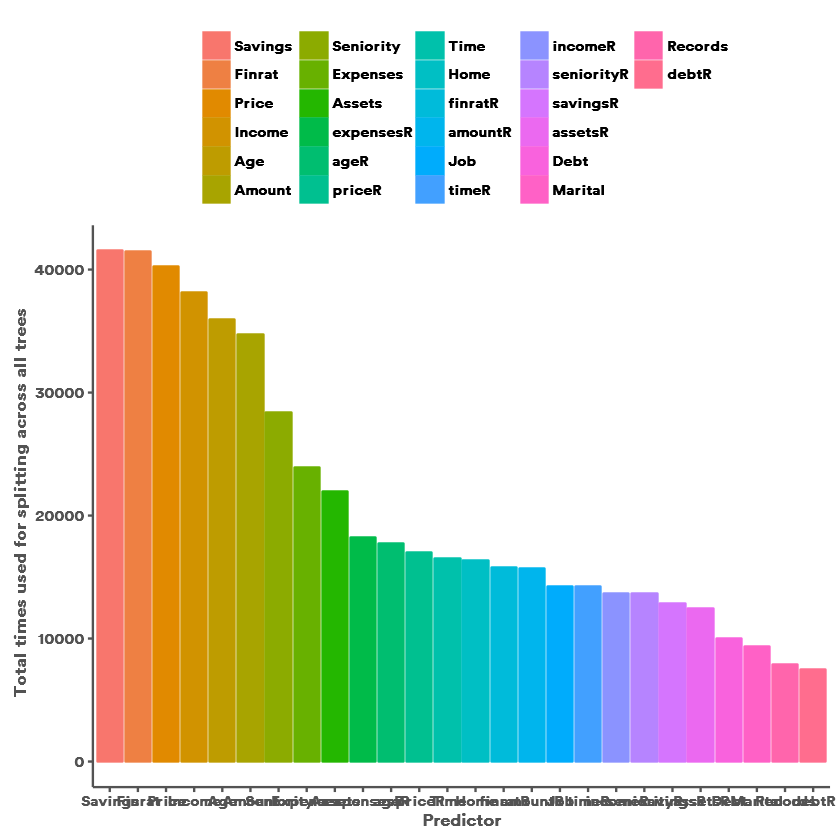

In [115]:
varsUsedPlot(cs_data_train, rf, "Status")

#### Variable Importance

* Default is mean Gini gain produced by X over all trees. Biased in favor of continuous variables and variables with many categories. http://freakonometrics.hypotheses.org/19835

* mean decrease in classification accuracy (OOB accuracy)  after permuting Xj over all trees (The most popular VIMP method uses
a prediction error approach involving “noising-up” each variable in turn. VIMP for a variable
xv is the difference between prediction error when xv is noised up by randomly permuting
its values, compared to prediction error under the observed values) 

* the current null hypothesis reflects independence of Xj (The idea is if the Xj is independent of Y and Xi then rearranging it should not affect the accuracy)
from
both Y and the remaining predictor variables Z. However it works poorly if the variables are highly correlated, so we need to condition the result on the highly correlated ones. Use the `cforest` in `party` package.library(party)
cf1 <- cforest(y~.,data=df,control=cforest_unbiased(mtry=2,ntree=50))
varimp(cf1)
varimp(cf1,conditional=TRUE). However it is very computationally intensive.

* Variable importance close to zero indicates the variable contributes nothing to predictive
accuracy, and negative values indicate the predictive accuracy improves when the variable is
mispecified.


* Another way to evaluate the importance of variables: Minimal depth assumes that variables with high impact on the
prediction are those that most frequently split nodes nearest to the trunks of the trees (i.e.
at the root node) where they partition large samples of the population.
Within a tree, node levels are numbered based on their relative distance to the trunk of the
tree (with the root at 0). Minimal depth measures the important risk factors by averaging
the depth of the first split for each variable over all trees within the forest.


* For interactions, second-order maximal (x j , x i )-subtrees are used that are defined as the maximal x j -subtree within a maximal x i -subtree. Here, the minimal depth is the distance of the maximal (x j , x i )-subtree to the root of the maximal x i -subtree.

*  Coplot: Variable Coplots. Predicted median home values as a function of percentage of
lower status population, stratified by average number of rooms groups. (condition the partial plots on different segmentations)

In [17]:
variableImportanceResult = importance(rf) 
    d <- data.frame(rownames(variableImportanceResult),round(variableImportanceResult,2))
    names(d)[c(1,ncol(d)-1,ncol(d))] <- c("Predictor","mda","mdg")

In [20]:
library(tidyr)


Attaching package: 'tidyr'

The following object is masked from 'package:RCurl':

    complete



In [116]:
# metric: mda means mean dicrease in accuracy and mdg meand the mean decrease in gini 
generateImportancePlot = function(model, metric){
    variableImportanceResult = importance(model) 
    d <- data.frame(rownames(variableImportanceResult),round(variableImportanceResult,2))
    names(d)[c(1,ncol(d)-1,ncol(d))] <- c("Predictor","mda","mdg")
    if(metric == "mda"){
        y_lab = "Variable Importance based on Mean Decrease in Accuracy"
    } else{
                y_lab = "Variable Importance based on Mean Decrease in Gini"

    }
    rownames(d) = NULL
    d = d[order(d[,metric], decreasing = TRUE),]
    d$Predictor = factor(d$Predictor, levels = rev(d$Predictor))
   
    vimp_plot = ggplot(d, aes_string(x="Predictor",y=metric,group="Predictor",colour="Predictor",fill="Predictor")) +
     geom_bar(stat="identity") +
     theme_tech("airbnb")+ coord_flip()+xlab("Variable Names") + ylab(y_lab) + ggtitle("Variable Importance Plot") + theme(legend.position="top")
    if(nrow(d)<=5) {
        vimp_plot = vimp_plot + scale_fill_tech("Airbnb")
    }
    vimp_plot
}

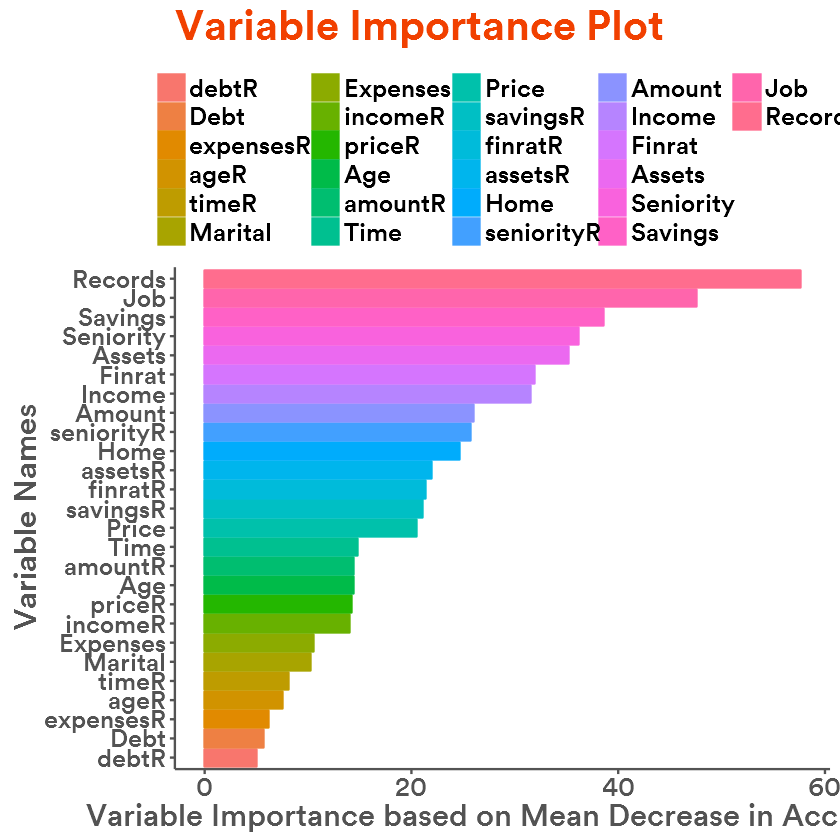

In [117]:
generateImportancePlot(rf, "mda")

In [255]:
library(reshape2)

In [262]:
names(importance.melt) <- c("Y","X","Importance")

In [41]:
levels(importance.melt$Y)

NULL

In [42]:
impTablePlot <- function(model ){
variableImportanceResult = importance(model)
d <- data.frame(rownames(variableImportanceResult),round(variableImportanceResult,2))
    names(d)[c(1,ncol(d)-1,ncol(d))] <- c("Predictor","mda","mdg")
importance.melt = d %>% select(Predictor, mda, mdg) %>% 
                      gather(Predictor, key = X, value = Importance, mda, mdg, -Predictor) %>% 
                      rename(Y= Predictor)
importance.melt$X = as.factor(importance.melt$X)
g1 <- ggplot(data=importance.melt, aes(x = X, y = Y, fill = Importance, label=Importance))  + 
    theme(legend.position="top", legend.key.width=unit(0.1,"npc")) +
    labs(x = "Response class and mean performance measures", y = "Predictor") +
    geom_raster() +
    geom_text(size=5) +
    scale_fill_gradient( low = "white", high = "#fd5c63", na.value="black", name = "Importance" ) +
    geom_rect(size=1, fill=NA, colour="black",
       aes(xmin=length(levels(X))-1-0.5, xmax=length(levels(X))-1+0.5, ymin=1-0.5, 
           ymax=length(levels(Y))+0.5)) +
    geom_rect(size=2, fill=NA, colour="black",
       aes(xmin=1-0.5, xmax=length(levels(X))+0.5, ymin=1-0.5, ymax=length(levels(Y))+0.5)) +
    scale_x_discrete(expand = c(0, 0)) + theme_tech("airbnb") +
    scale_y_discrete(expand = c(0, 0)) + theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.4))
    print(g1)
}

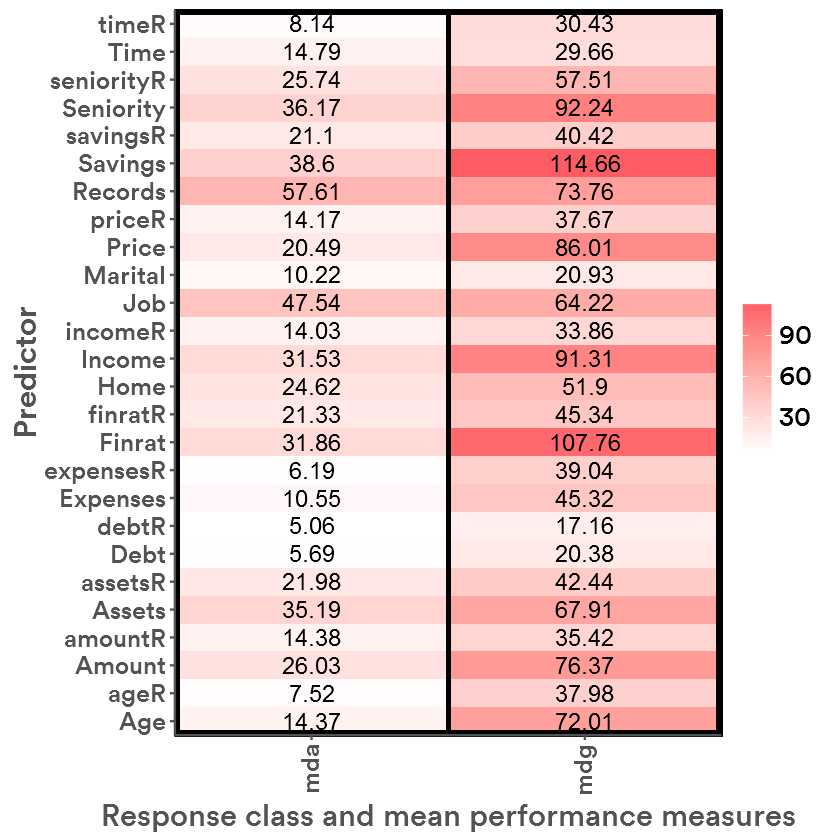

In [43]:
impTablePlot(rf)

#### Partial Plot

They can approximate arbitrary functional forms between explanatory and outcome variables, making it easy to discover complex
nonlinear relationships that would be missed without explicit specification by many standard methods

1) Find the feature you are interested in and all the possible values of size k

2) Then at each iteration, assign each data point the same value in this feature and drop this dataset 
   through the random forest and find the prediction for each data point
   
3) Then compute the percentage of the vote that favors class i (if it is a classification, use logit transformation
    ,f(x) = log pk(x) − sum(log(pj(x)))/j) compared to the votes for other classes, how favorable the feature is to this class controlling for other factors

    
 * The range is compressed compared to the original data because of averaging.  For classification, the function is computed in the logit scale, so it's not necessarily positive.  High does mean higher probability for the target class.
 * The actual y value does not matter but the trend of the plot 
 * Interpretation: The value of this feature is more likely to be a positive class.

In [44]:
# Construct the variable table
xvariable = c("Records", "Finrat")
friendlyName = xvariable
nameTable = data.frame(xvar = xvariable, xvar_friendlyname = friendlyName, stringsAsFactors = FALSE )

In [47]:
partialPlotFunct = function(model, pred.data, i, class, class_friendly_name){
    
    pd = do.call(data.frame,
            partialPlot(model, pred.data = pred.data, x.var = eval(nameTable$xvar[i]), 
                                     which.class = class,plot=F))
    
    if(is.numeric(pd[,1])){
    g1 <- ggplot(data=pd,aes(x= x,y= y)) 
    g1 <- g1 + #scale_colour_gradient2( low = "orange4", mid="white", high = "purple4") +
      theme(legend.position="top", legend.key.width=unit(0.1,"npc")) + theme_tech("airbnb")+
      #geom_line(aes_string(colour=names(pd)[2]),size=1.5)
      geom_line(colour="black",size=1.5) + xlab(nameTable$xvar_friendlyname[i]) + ylab(class_friendly_name)
      
  } else {
    g1 <- ggplot(data=pd,aes(x=x,y=y, fill=pd$x)) 
    g1 <- g1 + theme_tech("airbnb") + 
        theme(legend.position="top") + geom_bar(stat="identity")+
        xlab(nameTable$xvar_friendlyname[i]) + 
        ylab(class_friendly_name) +
        theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.4))
    if(nrow(pd)<=5){
        g1 = g1 + scale_fill_tech("airbnb")
    }
  }
 suppressWarnings(return(g1))
}            


In [48]:
partialPlotList = list()

In [49]:
for (i in 1:nrow(nameTable)){
    partialPlotList[[i]] = partialPlotFunct(rf, cs_data_train, i, "bad", "bad")
}


Attaching package: 'gridExtra'

The following object is masked from 'package:randomForest':

    combine

The following object is masked from 'package:dplyr':

    combine



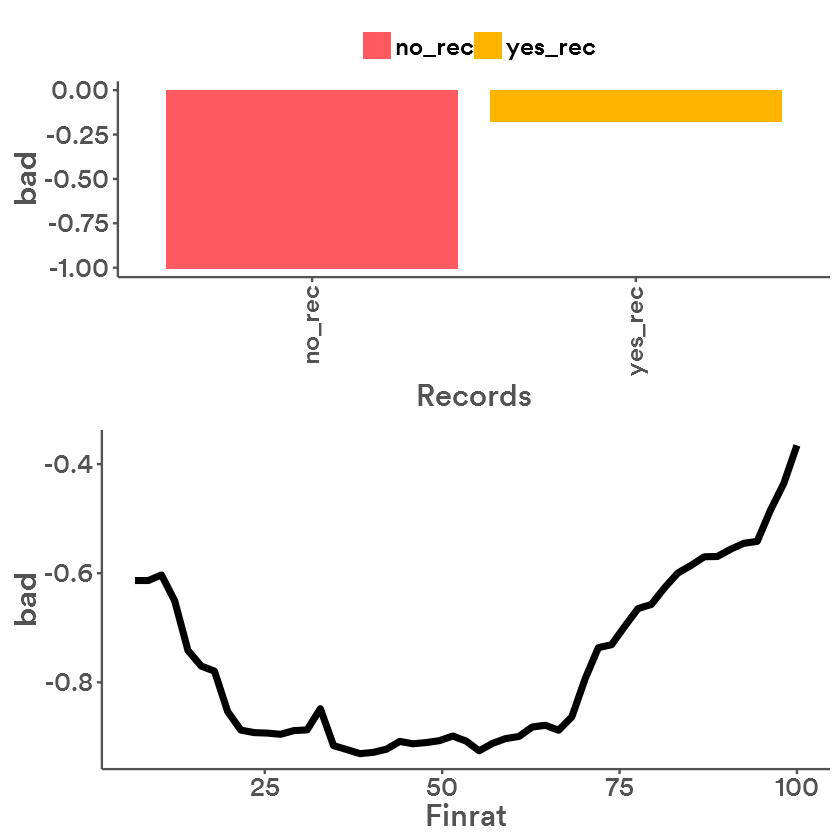

In [50]:
library(gridExtra)
n <- length(partialPlotList)
nCol <- floor(sqrt(n))
suppressWarnings(do.call("grid.arrange", c(partialPlotList, ncol=nCol)))

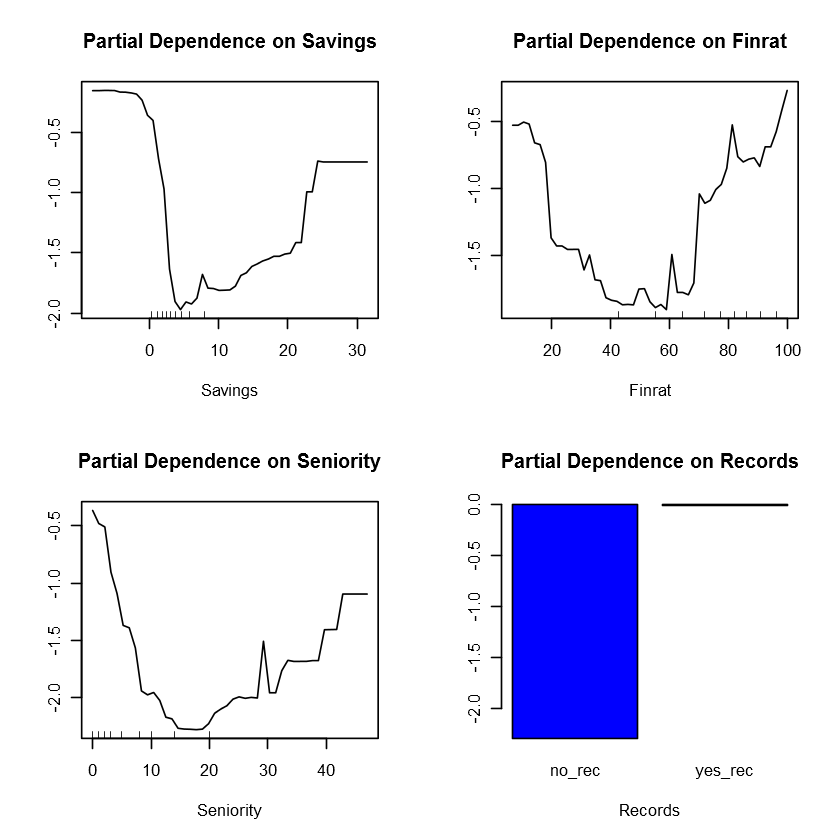

In [36]:
op <- par(mfrow=c(2, 2))
partialPlot(rf, cs_data_train, Savings, "bad")
partialPlot(rf, cs_data_train, Finrat, "bad")
partialPlot(rf, cs_data_train, Seniority, "bad")
partialPlot(rf, cs_data_train, Records, "bad")

### Outlier Detection

http://stats.stackexchange.com/questions/16837/how-to-detect-outliers-in-randomforest-regression-models

* Specify proximity = TRUE. If it is an outlier it should stay far away from other points. 

In [ ]:
outlier(<rf object>$proximity)